In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight') # For better style

df = pd.read_excel('dataset_new.xlsx')

# also should loop thru and de-capitalize all the labels...

def fixBinaries():
    for col in df:
        if df[col][0] == 'Yes' or df[col][0] == 'No':
            # Yes == 1, No == 0
            df[col] = pd.Series(np.where(df[col].values == 'Yes', 1, 0),df.index)
            
fixBinaries()

In [3]:
print( df.balbudget.value_counts() )

1    40
0     9
Name: balbudget, dtype: int64


In [4]:
# who does not have to execute a balanced budget?
df.loc[df['balbudget'] == 0].state

4       California
6      Connecticut
12        Illinois
13         Indiana
17       Louisiana
21        Michigan
37    Rhode Island
43         Vermont
47       Wisconsin
Name: state, dtype: object

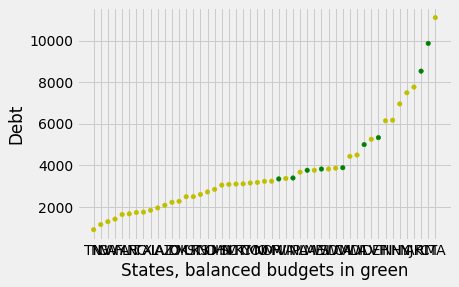

In [5]:
# order the plot so it is a ~line
df.sort_values(by=['gvtdebtpc'], inplace=True)

# create the color palette
colors = df.balbudget.map({0:'g', 1:'y'})

# show me the money
df.plot( kind='scatter', x='code', y='gvtdebtpc', c=colors )
plt.xlabel("States, balanced budgets in green")
plt.ylabel("Debt")
plt.show()

Certainly looks like a break there - two patterns... first is that gradual, linear part, but then it breaks a sky rockets - color doesn't correlate either

Also need to do one of those 4x4 plots of all the correlations in one plt

In [1]:
# for col in df:
# #     df.plot( kind='scatter', y='gvtdebtpc', x=col, c=colors, rot=90, fontsize=7 )
#     guy = 'repgov%'
#     df.plot( kind='scatter', x=guy, y=col, c=colors )
# #     plt.show()
#     plt.savefig( "figs/" + guy + "_" + col +".png")